In [1]:
# Step 1: Importing required libraries

import pandas as pd

from sklearn.tree import DecisionTreeClassifier, export_text

from sklearn import tree 

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, classification_report

import matplotlib.pyplot as plt

import matplotlib.patches as mpatches

import seaborn as sns

import numpy as np

import dtreeviz

import warnings

In [2]:
# For Suppressing all warnings
warnings.filterwarnings('ignore')

## Data Overview
### About the Kyphosis Dataset
- Kyphosis is an abnormally excessive convex curvature of the spine.
- This dataset provides information about children who have undergone corrective spinal surgery.
- Dataset contains 81 rows and 4 columns representing data on children who have had corrective spinal surgery.

### Structural Analysis
- Dataset: kyphosis.csv
- Number of Rows: 81
- Number of Columns: 4

### INPUTS:
- Age: The age of the patient in months (children),
- Number: The number of vertebrae involved in the surgery,
- Start: The number of the first (top-most) vertebra operated on.
- Kyphosis: Indicates whether kyphosis was present or absent after the operation.

### OUTPUTS: 
- Represents a factor with variables present and absent indicating if kyphosis (a type of deformation) was present or not after the corrective spinal surgery.

*Source: https://www.kaggle.com/code/duygujones/kyphosis-disease-detailed-eda-project*

In [3]:
# Step 2: Importing required dataset
kyphosis_dataset=pd.read_csv("datasets/kyphosis_dataset.csv")

In [4]:
kyphosis_dataset

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [5]:
kyphosis_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [6]:
kyphosis_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,81.0,83.654321,58.104251,1.0,26.0,87.0,130.0,206.0
Number,81.0,4.049383,1.619423,2.0,3.0,4.0,5.0,10.0
Start,81.0,11.493827,4.883962,1.0,9.0,13.0,16.0,18.0


In [7]:
kyphosis_dataset.describe(include="object").T

,count,unique,top,freq
Kyphosis,81,2,absent,64


In [8]:
le=LabelEncoder()
kyphosis_dataset['Kyphosis'] = le.fit_transform(kyphosis_dataset['Kyphosis'])
kyphosis_dataset

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


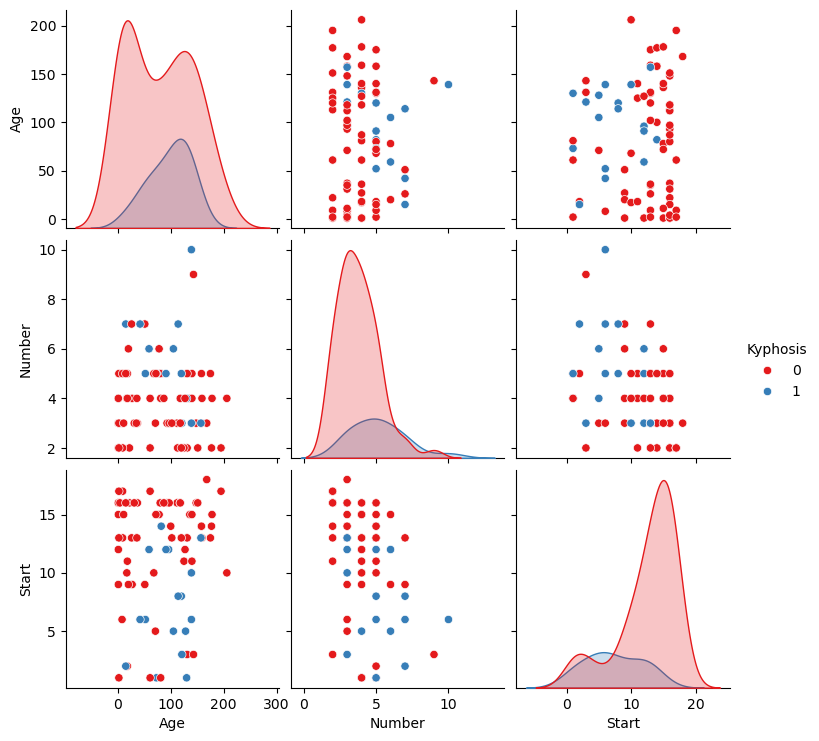

In [9]:
# Ploting pairplot of the dataset to cheeck what are the corelations between the features with Kyphosis absent or present.
sns.pairplot(kyphosis_dataset,hue='Kyphosis',palette='Set1')

## Output:"Paitplot for all features"

### Age Distribution:
- Participants without kyphosis (red) are predominantly younger.
- Participants with kyphosis (blue) are more spread out in age but still have a significant presence in the younger age range.

### Number:
- Both groups have a similar distribution in the number affected, with no clear distinction between kyphosis presence or absence.

### Start:
- The start values are widely spread across both groups, showing no clear pattern distinguishing participants with and without kyphosis.

Overall, there are no strong patterns differentiating participants with and without kyphosis based on age, number or start. 

*Source: https://www.kaggle.com/code/duygujones/kyphosis-disease-detailed-eda-project*

<function matplotlib.pyplot.show(close=None, block=None)>

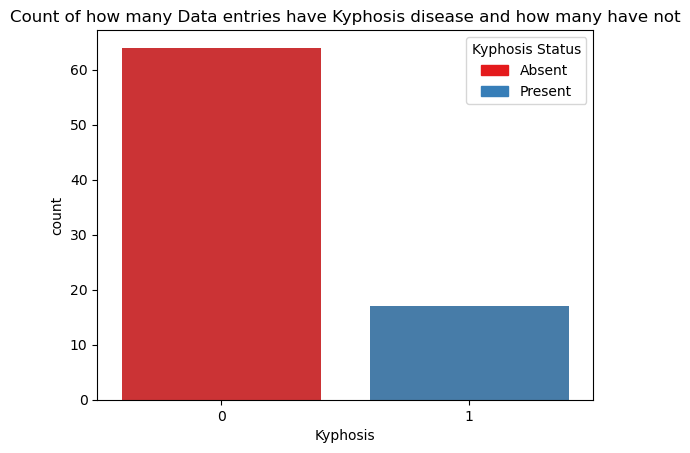

In [10]:
# using count plot to plot out of all data entries available how much have (present) kyphosis and how much doesnot (absent) have kyphosis after surgery.
sns.countplot(x = kyphosis_dataset['Kyphosis'], hue=kyphosis_dataset['Kyphosis'], palette=['#e41a1c','#377eb8'])
# Create custom legend
absent_patch = mpatches.Patch(color='#e41a1c', label='Absent')
present_patch = mpatches.Patch(color='#377eb8', label='Present')
plt.legend(handles=[absent_patch, present_patch], title='Kyphosis Status', loc='upper right')
plt.title("Count of how many Data entries have Kyphosis disease and how many have not")
plt.show

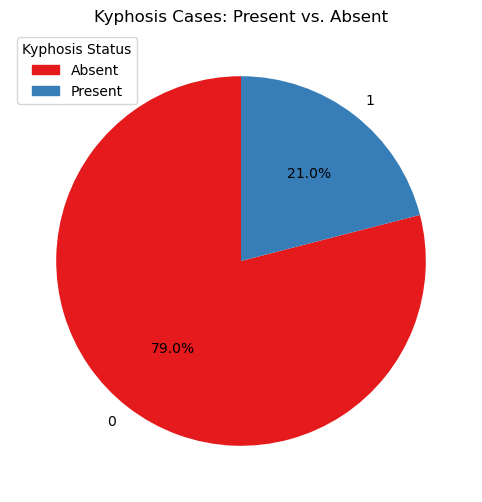

In [11]:
# Plot the pie chart with percentages for Kyphosis cases

# Count the number of "Present" and "Absent" cases
kyphosis_counts = kyphosis_dataset['Kyphosis'].value_counts()

# Plot the pie chart
plt.figure(figsize=(10,6))

plt.pie(kyphosis_counts, labels=kyphosis_counts.index, autopct='%1.1f%%', colors=['#e41a1c','#377eb8'], startangle=90)
plt.title('Kyphosis Cases: Present vs. Absent')

# Create custom legend
absent_patch = mpatches.Patch(color='#e41a1c', label='Absent')
present_patch = mpatches.Patch(color='#377eb8', label='Present')
plt.legend(handles=[absent_patch, present_patch], title='Kyphosis Status', loc='upper left')

# Display the plot
plt.show()

<Axes: >

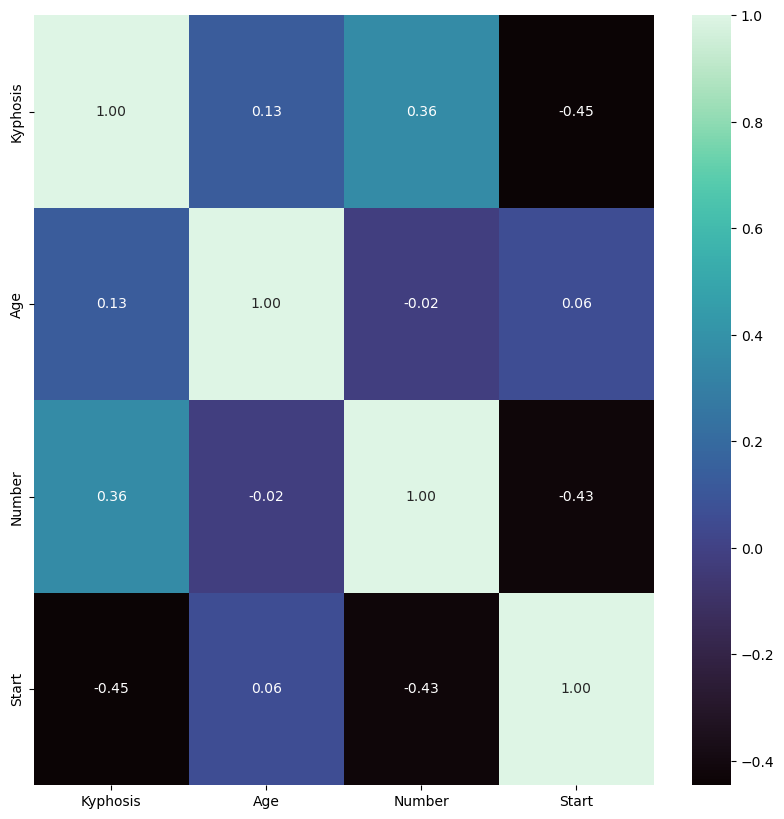

In [12]:
#Heatmap showing how features in kyphosis dataset are corelated with each other using confusion matrx.
plt.figure(figsize=(10,10)) 
sns.heatmap(kyphosis_dataset.corr(), fmt='.2f', annot = True, cmap='mako')

## Output:Correlation Matrix

### Kyphosis Status:

- Negatively correlated with Start (-0.45).
- Positively correlated with Number (0.36).

## Age:

- Weak positive correlation with Kyphosis (0.13) and weak negative correlations with other variables.

## Start Relationships:

- Moderate negative correlation between Start and Number (-0.43).

This suggests that kyphosis is more likely to be present with a higher number of vertebrae involved and less likely as the starting vertebra number increases.

*Source: https://www.kaggle.com/code/duygujones/kyphosis-disease-detailed-eda-project*

In [13]:
# Step 3: Split Dataset into two parts one target (y) and one attributes (x)
x = kyphosis_dataset[['Age','Number','Start']]
y = kyphosis_dataset['Kyphosis']

In [14]:
x

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [15]:
y

0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int64

In [16]:
# Step 4: Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True)

In [17]:
x_train

,Age,Number,Start
0,71,3,5
16,78,6,15
17,175,5,13
64,118,4,16
71,127,4,12
...,...,...,...
74,11,3,15
7,37,3,16
23,131,2,3
51,9,2,17


In [18]:
x_test

,Age,Number,Start
3,2,5,1
77,26,7,13
50,68,5,10
52,139,10,6
15,1,3,16
69,15,5,16
6,61,2,17
31,125,2,11
54,140,4,15
75,178,4,15


In [19]:
y_train

0     0
16    0
17    0
64    0
71    0
     ..
74    0
7     0
23    0
51    0
35    0
Name: Kyphosis, Length: 64, dtype: int64

In [20]:
y_test

3     0
77    0
50    0
52    1
15    0
69    0
6     0
31    0
54    0
75    0
30    0
34    0
26    0
36    0
45    1
27    0
24    1
Name: Kyphosis, dtype: int64

In [21]:
# Step 5: Initilaizing Decision tree Classifier
decision_tree_classifier_model=DecisionTreeClassifier()

In [22]:
# Step 6: Training DecisionTreeClassifier
decision_tree_classifier_trained_model=decision_tree_classifier_model.fit(x_train,y_train)

In [23]:
# Step 7: Getting Predictions from the trained model or testing the trained model on test data
predictions_y = decision_tree_classifier_trained_model.predict(x_test)

In [24]:
predictions_y

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

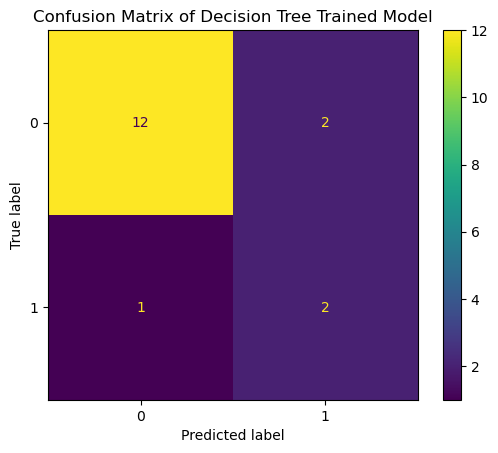

In [25]:
# Step 8: Confusion Matrix 
cm = confusion_matrix(y_test,predictions_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of Decision Tree Trained Model")
plt.show()

In [26]:
#Step 9: Classification report of the trained model
print(classification_report(y_test,predictions_y))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.50      0.67      0.57         3

    accuracy                           0.82        17
   macro avg       0.71      0.76      0.73        17
weighted avg       0.85      0.82      0.83        17



In [27]:
# Step 10: Accuracy Score of the trained Model
aucc_score=accuracy_score(y_test,predictions_y)
print("Accuracy of the trained Decision Tree Model is: ", f'{aucc_score:.2f}')

Accuracy of the trained Decision Tree Model is:  0.82


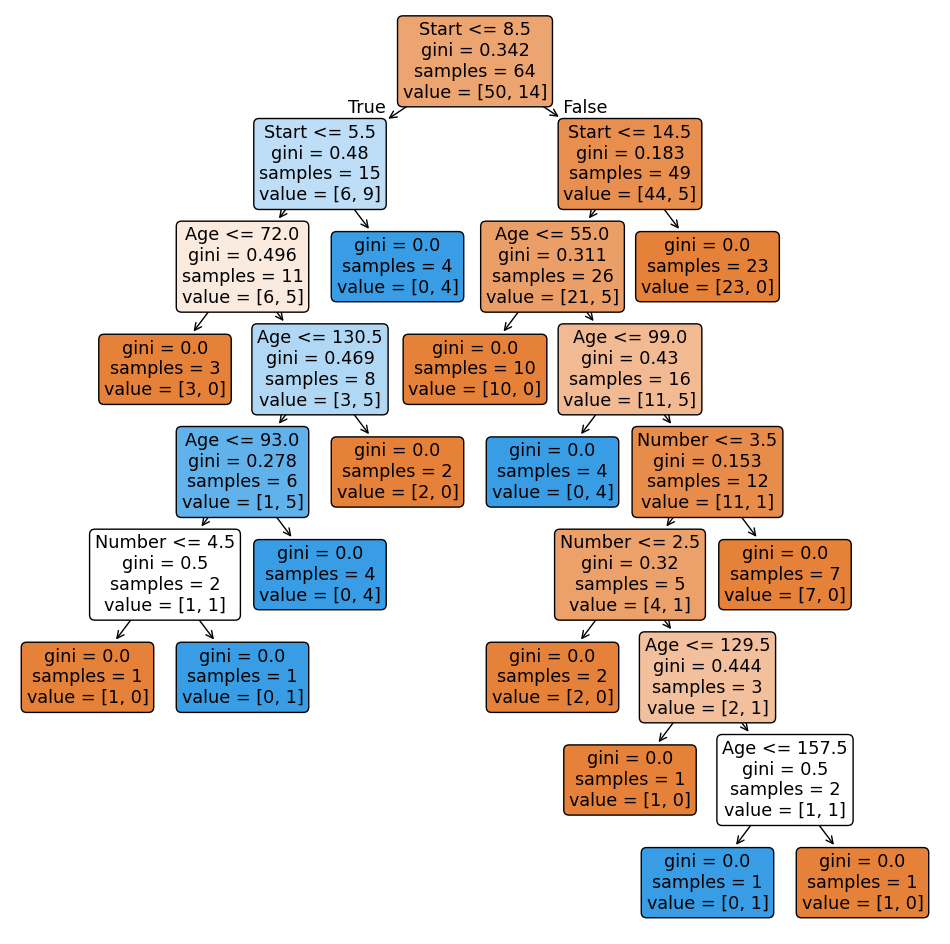

In [28]:
# Step 11: Visualizing Trained Decision Tree Model
features = list(kyphosis_dataset.columns[1:])
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(decision_tree_classifier_trained_model, feature_names=features, filled=True, rounded=True, ax=ax)

plt.show()

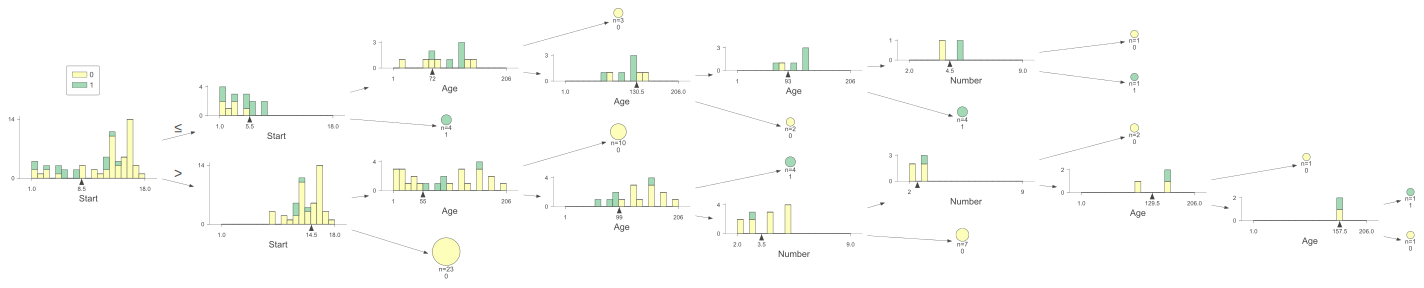

In [29]:
# Step 11: Cont. Visualizing trained Decision Tree Model using dtreeviz library in left-to-right oreintation
viz = dtreeviz.model(decision_tree_classifier_trained_model, x_train, y_train, feature_names=["Age", "Number", "Start"], 
               class_names=[0,1])

viz.view(scale=1,orientation="LR")

# Source: https://medium.com/@MrBam44/decision-trees-91f61a42c724
# In case you get error like "findfont: Font family 'Arial' not found." it is mostly due to the reason that your system doesn't
# have "Arial" font installed and the dtreeviz uses "Arial" as its default font for displaying its text if not fontname is provided.
# If on windows you will not encounter this problem as windows has "Arial" font Pre-installed, this problem usually comes on
# linux as it doesn't have "Arial" font pre-installed, so in order to resolve this problem you can follow 2 steps:

# 1.) In one step ypu can either use some another font which are preinstalled on your linux system like:"Liberation Sans" 
# (as a parameter tp `viz.view(scale=1, fontname = 'Liberation Sans',orientation="LR")` ) 
# "Liberation Sans" comes pre-installed with almost all linux distributions. If this doesn't works and you encounter same 
# problem as "findfont: Font family 'Liberation Sans' not found." then it might not be installed on you system, to check 
# available fonts on you system go to your terminal (ZSH/Bash, etc) type 'fc-list : family` (excluding `) this will list all the
# font-family of the fonts installed on your system choose any one you like and then replace it here in the above 
# `fontname` parameter of `viz.view()` function.
# If this fc-cache command not runs then your system might not have fontconfig is not installed on it
# to install it use the follwoing commands as per your linux distro:
# sudo apt update && sudo apt install fontconfig -y  <For Debian based distros like Ubuntu, etc>
# sudo dnf install fontconfig   <For RHEL based distros like CentOS, Fedora, etx>

#2.) Alternatively you can install "Arial" on your linux distro using the following set of commands:
# A.) if on Debian based distros like Ubuntu, etc we use apt as package manager :
# sudo apt update
# sudo apt install ttf-mscorefonts-installer
# B.) if on RHEL (Red Hat Enterprise Linux) based distros like CentOS, Fedora etc we use dnf as package manager:
# sudo dnf update
# sudo dnf install ttf-mscorefonts-installer

# sudo fc-cache -f -v <This rebuilts font cache of the system>

# If for some reason fc-cache command not runs then your system might not have fontconfig is not installed on your system
# to install it use the follwoing commands as per your linux distro:
# sudo apt update && sudo apt install fontconfig -y  <For A.) type distros>
# sudo dnf install fontconfig   <For B.) type distros>

# fc-list | grep "Arial"   <This will verify if Arial is installed or not>
# rm ~/.cache/matplotlib -rf   <This removes the matplotlib old cache as it sometimes doesn't pick up new installed fonts>

# More detailed on this resoultion step can be found on : https://github.com/ranaroussi/quantstats/issues/203#issuecomment-2419372779

# Also even if following all the above steps the issue still precists try installing font-manager with following commands:
# sudo apt install font-manager   <For A.) type distros>
# sudo dnf install font-manager   <For B.) type distros>

# sudo fc-cache -f -v <This rebuilts font cache of the system>

# rm ~/.cache/matplotlib -fr   <This removes the matplotlib old cache as it sometimes doesn't pick up new installed fonts>

# More Details on this can be found on: https://stackoverflow.com/questions/42097053/matplotlib-cannot-find-basic-fonts

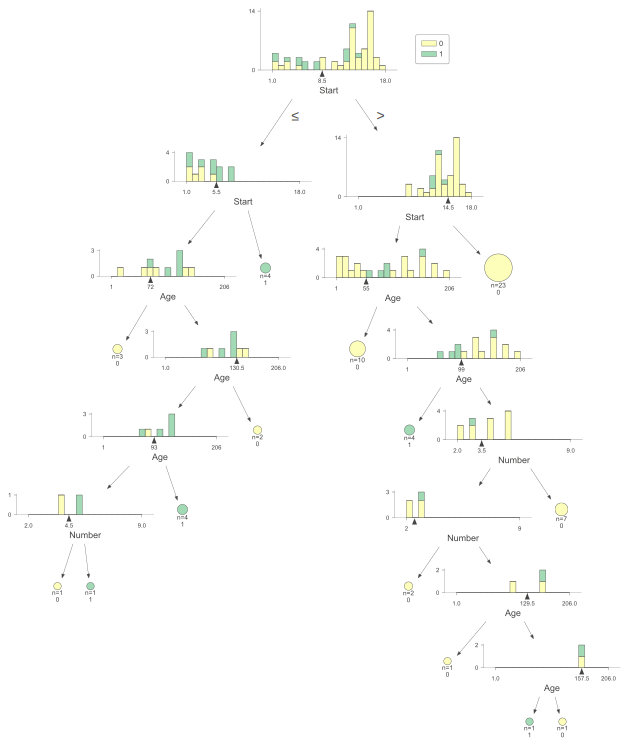

In [30]:
# Step 11: Cont. Visualizing trained Decision Tree Model using dtreeviz library in top-to-bottom orientation (default)
viz.view(scale=1)

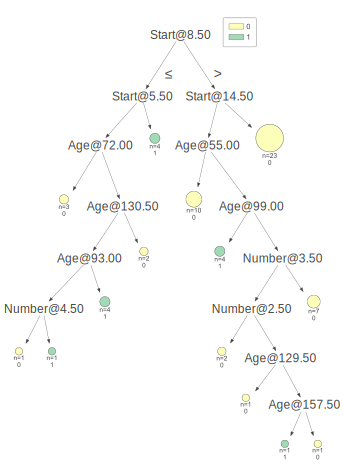

In [31]:
# Step 11: Cont. Visualizing trained Decision Tree Model using dtreeviz library only node values are shown here.
viz.view(fancy=False)

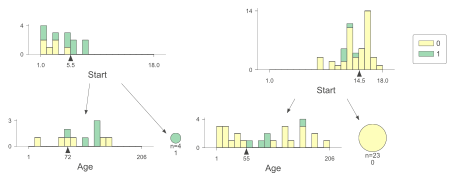

In [32]:
# Step 11: Cont. Visualizing trained Decision Tree Model using dtreeviz library and only showing tree to a certain depth of 2 here,
viz.view(depth_range_to_display=(1, 2)) # root is level 0

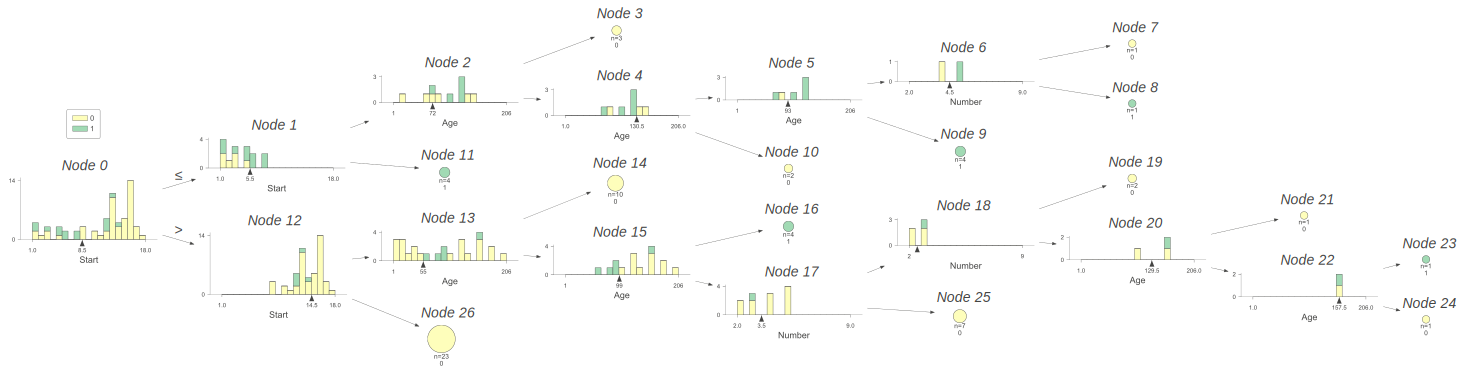

In [33]:
# Step 11: Cont. Visualizing trained Decision Tree Model using dtreeviz library with node numbering.
viz.view(show_node_labels=True,orientation='LR')

In [34]:
# Step 12: To check wheather the tree is balanced or not
tree_text = export_text(decision_tree_classifier_trained_model, feature_names=features)
print(tree_text)

|--- Start <= 8.50
|   |--- Start <= 5.50
|   |   |--- Age <= 72.00
|   |   |   |--- class: 0
|   |   |--- Age >  72.00
|   |   |   |--- Age <= 130.50
|   |   |   |   |--- Age <= 93.00
|   |   |   |   |   |--- Number <= 4.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Number >  4.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- Age >  93.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- Age >  130.50
|   |   |   |   |--- class: 0
|   |--- Start >  5.50
|   |   |--- class: 1
|--- Start >  8.50
|   |--- Start <= 14.50
|   |   |--- Age <= 55.00
|   |   |   |--- class: 0
|   |   |--- Age >  55.00
|   |   |   |--- Age <= 99.00
|   |   |   |   |--- class: 1
|   |   |   |--- Age >  99.00
|   |   |   |   |--- Number <= 3.50
|   |   |   |   |   |--- Number <= 2.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Number >  2.50
|   |   |   |   |   |   |--- Age <= 129.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Age > 

- Based on the provided text representation of the decision tree, it is not immediately clear whether the tree is balanced or not.
- The balance of a decision tree refers to the distribution of samples across the tree's nodes.
- To determine the balance of the tree, we would need additional information such as the number of samples in each class at each node or the total number of samples in the dataset used to train the tree.

*Source: https://www.kaggle.com/code/bromotdi/decision-trees-project*

In [35]:
# Step 12: Cont.
def print_node_class_distribution(tree_model, tree, node_index=0, depth=0):
    indent = "  " * depth
    class_counts = tree.value[node_index].squeeze()
    total_samples = class_counts.sum()
    class_labels = tree_model.classes_
    
    print(f"{indent}Class Distribution: {class_counts} (Total: {total_samples})")
    
    if tree.children_left[node_index] != tree.children_right[node_index]:
        print_node_class_distribution(tree_model, tree, tree.children_left[node_index], depth + 1)
        print_node_class_distribution(tree_model, tree, tree.children_right[node_index], depth + 1)

# Here `decision_tree_classifier_trained_model` is the trained decision tree model
print_node_class_distribution(decision_tree_classifier_trained_model, decision_tree_classifier_trained_model.tree_)

Class Distribution: [0.78125 0.21875] (Total: 1.0)
  Class Distribution: [0.4 0.6] (Total: 1.0)
    Class Distribution: [0.54545455 0.45454545] (Total: 1.0)
      Class Distribution: [1. 0.] (Total: 1.0)
      Class Distribution: [0.375 0.625] (Total: 1.0)
        Class Distribution: [0.16666667 0.83333333] (Total: 1.0)
          Class Distribution: [0.5 0.5] (Total: 1.0)
            Class Distribution: [1. 0.] (Total: 1.0)
            Class Distribution: [0. 1.] (Total: 1.0)
          Class Distribution: [0. 1.] (Total: 1.0)
        Class Distribution: [1. 0.] (Total: 1.0)
    Class Distribution: [0. 1.] (Total: 1.0)
  Class Distribution: [0.89795918 0.10204082] (Total: 1.0)
    Class Distribution: [0.80769231 0.19230769] (Total: 1.0)
      Class Distribution: [1. 0.] (Total: 1.0)
      Class Distribution: [0.6875 0.3125] (Total: 1.0)
        Class Distribution: [0. 1.] (Total: 1.0)
        Class Distribution: [0.91666667 0.08333333] (Total: 1.0)
          Class Distribution: [0.8 0.2

Looking at the class distributions in the provided tree, we can see that the distribution varies at different nodes. For example:

- At the root node (depth 0), we have [44, 12] which indicates an imbalance with one class having a significantly higher number of samples than the other.
- At other nodes, such as [6, 8], [5, 2], [1, 6], [38, 4], and [17, 4], we still observe imbalances between the classes.

These imbalances suggest that the tree is not strictly balanced. It's worth noting that an imbalanced tree doesn't necessarily indicate poor performance or lack of usefulness. The tree may still provide accurate predictions for the majority class or perform well in the given context. The evaluation of the tree's performance should be based on appropriate metrics and considerations specific to the problem being addressed.

*Source:https://www.kaggle.com/code/bromotdi/decision-trees-project*

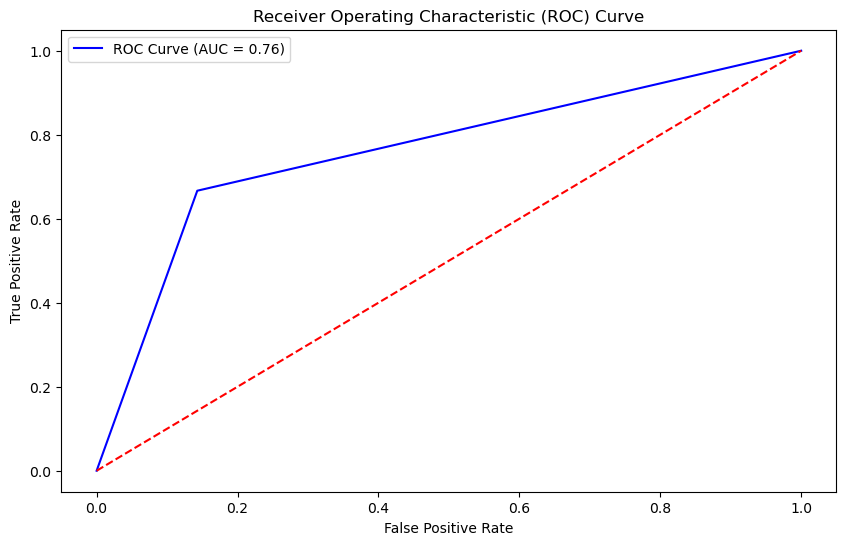

In [36]:
# Step 13: Visualizing and Ploting ROC Curve
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, decision_tree_classifier_trained_model.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

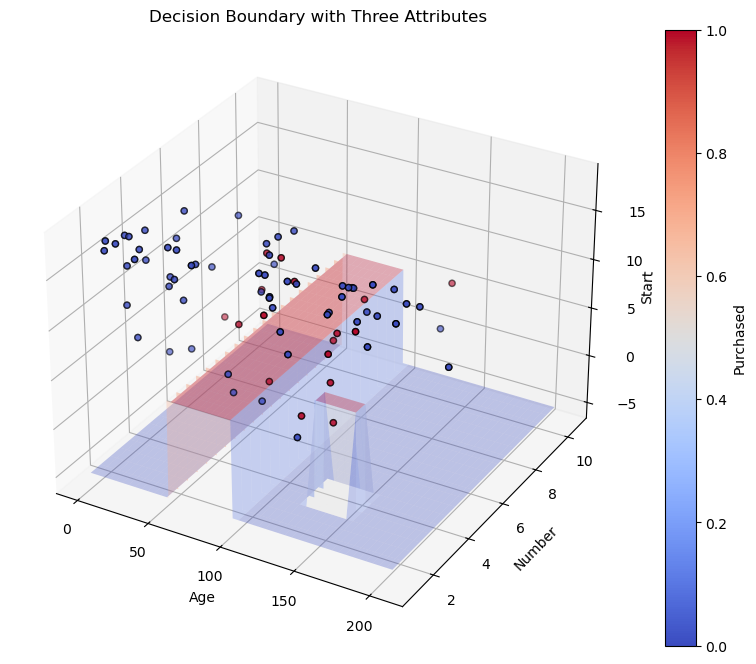

In [37]:
# Step 14: Visualizing Decision Boundary by creating a meshgrid for plotting decision boundary
x_min, x_max = x['Age'].min() - 1, x['Age'].max() + 1
y_min, y_max = x['Number'].min() - 1, x['Number'].max() + 1
z_min, z_max = x['Start'].min() - 1, x['Start'].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5),
                     np.arange(y_min, y_max, 0.5))

# Predict class for each point in the meshgrid
zz = np.zeros(xx.shape)
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        zz[i,j] = decision_tree_classifier_trained_model.predict([[xx[i,j], yy[i,j], (z_min+z_max)/2]])

# Plotting the decision boundary in a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection='3d')

# Plot the surface
ax.plot_surface(xx, yy, zz*10-5,
                cmap='coolwarm', alpha=0.3)

# Scatter plot of data points
ax.scatter(x['Age'], x['Number'], x['Start'], c=y,
           cmap='coolwarm', edgecolor='k')

ax.set_xlabel('Age')
ax.set_ylabel('Number')
ax.set_zlabel('Start')

# Adjusting the scale to ensure all labels are properly shown
ax.tick_params(axis='x')
ax.tick_params(axis='y')
ax.tick_params(axis='z', pad=10)

ax.set_title('Decision Boundary with Three Attributes')

# Show color bar for better interpretability
# Scatter plot of data points
sc = ax.scatter(x['Age'], x['Number'], x['Start'], c=y, cmap='coolwarm', edgecolor='k')
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Purchased')

plt.show()